In [61]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [11]:
# Loading vectorized data
TrainData = pd.read_csv('XTrainPreEmb.csv')
TestData = pd.read_csv('XTestPreEmb.csv')
del TrainData['Unnamed: 0']
del TestData['Unnamed: 0']
TrainData = TrainData.to_numpy()
TestData = TestData.to_numpy()
print(TrainData, TrainData.shape)

[[   44     9    67 ... 18664 21078     1]
 [ 2657 16823     2 ...     8     1   221]
 [   14   272    35 ...   489  4286     2]
 ...
 [    9    65     3 ...    14    16    68]
 [    8  2615     4 ...  9983  8374    35]
 [ 2057  3950  2095 ...     0     0     0]] (35000, 128)


In [15]:
# loading Y labels
yTrain = pd.read_csv('yTrain.csv')
yTest = pd.read_csv('yTest.csv')
del yTrain['Unnamed: 0']
del yTest['Unnamed: 0']
yTrain = yTrain.to_numpy().reshape(-1)
ytest = yTest.to_numpy().reshape(-1)
print(yTrain, yTrain.shape)

[0 0 0 ... 0 0 1] (35000,)


# Explaining embedding layer

The following Recurrent Neural Network will use an Embedding layer. This requires at least three parameters: input dim, output dim and input lenght. The first one is the size of the vocabulary, in other words, it is the number of words considered to create the vectorization or the number of possible categories that the variable can take (assuming word as a categorical variable)

We're going to explain the third parameter before the second. This is the size of the input vector that is going to be processed in the layer. So remember we turn each text into a bunch of numbers, this are the indexes that represent each word. Also after this transformation, each movie review has only 128 numbers because they were truncated (longer than 128) or expanded (shorter than 128) with especial characters.

The second parameter is the lenght of the output of this layer. A 128 lenght vector (128 words represented by integers) will enter into the embedding and they will converted into a new 100 numbers (each word into a 100 numbers).

So, the wights of the embedding layers is a matrix of shape (input_dim, output_dim), this is total vocabulary, vector_lengh. This is like we are saying to the layer: distribute the meaning of each word (5000 in total) in 100 numbers (vector).

In [17]:
# Building model
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=5000, output_dim=100, input_length=128, trainable=True))
model.compile('adam', 'mse')

In [22]:
# Using the first review to explain
print(len(TrainData[0]))
TrainData[0]

128


array([   44,     9,    67,     6,   996,     3,    17, 41184,    10,
          17,    49,    26,  1529,  1632,    45,     4,   700,   390,
           9,    49,  1072,     7,    14,  1048,   114,  1632,   390,
         379,   471,  1632,   390,   435,   471,  1632,   390,   112,
        1632,   390,     7,     5,    14,   149,   306,   361,  1355,
         173,   278,    27,  2855,    15,     3,   365,    94,    58,
           3,   114,     2,   304,     3,    17,     7,     5,    33,
        1812,     8,   100,  1576,  1074,    11,     9,    49,   235,
         104,   318,  1298,   175,     3,   306,   361,    72,   104,
          10,    17,   182,   137,     5,     6,    26,   283,    16,
           1,  5922,     1,  5629,     8,     1,  8900,     5,    27,
           4,     1,    87, 13066,   150,   131,   120,    89,     4,
          29,     1, 20200,   308,  3162,  2977,  1959,    28,   231,
          80, 22074,    64,  2494,   141,     2,  2508,     6, 18664,
       21078,     1]

In [26]:
# Predicting
yhat = model.predict(TrainData[0])
yhat.shape

4/4 [==============================] - 0s 3ms/step


(128, 100)

In the previous exercise we took the the first review which has 128 numbers as words and apply it embedding layer. We can see that the results is not a vector, it is a matrix because it generate 100 new values for each word, this is a matrix with dimensions (words, embedding). So, the first review starts with the word "if", it was replaced with the integer 44 and this integer is replaced with the 100-sized vector below. This numbers are just random, se we need to train them to obtain real embeddings.

In [52]:
# Embedding for the fisrt word (44 - if)
print(len(yhat[0]))
yhat[0]

100


array([ 0.00999587, -0.02474396, -0.00606691, -0.02921927,  0.02361541,
       -0.04165374,  0.03124234, -0.04238681,  0.02807046, -0.02006915,
        0.00010406, -0.04998368,  0.01660511,  0.01022235,  0.00172912,
        0.04414826, -0.00776865,  0.01073672,  0.01838633,  0.01796745,
        0.03231701, -0.04837611, -0.03205442,  0.02314628, -0.01869798,
        0.04547398, -0.03823782, -0.0281237 ,  0.01298424,  0.02472458,
        0.00785778, -0.03511266, -0.01214719,  0.00582762, -0.01444442,
       -0.03441416, -0.02775677, -0.04945825,  0.02494426,  0.04398708,
       -0.03621458,  0.03865832,  0.03553817, -0.03419012, -0.01983539,
        0.01216161, -0.02481091,  0.020022  , -0.02701521, -0.01840409,
        0.0055626 , -0.02893373,  0.02799876, -0.03119987,  0.01887668,
        0.03477264, -0.04155242,  0.03319067, -0.01643298, -0.00826459,
       -0.02254723, -0.01686613,  0.02122463,  0.03059036,  0.02885791,
        0.03142967,  0.00674046,  0.04250219, -0.00104743,  0.04

As we mention before, if we check the embedding weights of the layer it is a matrix of 5000x100, that means this layer has a vector of lenght 100 for every single word of the vocabulary previously defined. If we select the embedding number 44, we obtain the same vector predicted for the word 44.

In [45]:
# Weights for embedding layer
model.get_weights()[0].shape

(5000, 100)

In [50]:
model.get_weights()[0][44]

array([ 0.00999587, -0.02474396, -0.00606691, -0.02921927,  0.02361541,
       -0.04165374,  0.03124234, -0.04238681,  0.02807046, -0.02006915,
        0.00010406, -0.04998368,  0.01660511,  0.01022235,  0.00172912,
        0.04414826, -0.00776865,  0.01073672,  0.01838633,  0.01796745,
        0.03231701, -0.04837611, -0.03205442,  0.02314628, -0.01869798,
        0.04547398, -0.03823782, -0.0281237 ,  0.01298424,  0.02472458,
        0.00785778, -0.03511266, -0.01214719,  0.00582762, -0.01444442,
       -0.03441416, -0.02775677, -0.04945825,  0.02494426,  0.04398708,
       -0.03621458,  0.03865832,  0.03553817, -0.03419012, -0.01983539,
        0.01216161, -0.02481091,  0.020022  , -0.02701521, -0.01840409,
        0.0055626 , -0.02893373,  0.02799876, -0.03119987,  0.01887668,
        0.03477264, -0.04155242,  0.03319067, -0.01643298, -0.00826459,
       -0.02254723, -0.01686613,  0.02122463,  0.03059036,  0.02885791,
        0.03142967,  0.00674046,  0.04250219, -0.00104743,  0.04

# Training LSTM

In [64]:
# Bulding architecture
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=5000, output_dim=100, input_length=128, trainable=True))
model.add(keras.layers.LSTM(100, dropout=0.2, return_sequences=True))
model.add(keras.layers.LSTM(100, dropout=0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 128, 100)          500000    
                                                                 
 lstm_2 (LSTM)               (None, 128, 100)          80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 660,901
Trainable params: 660,901
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compiling
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
# Training
history = model.fit(TrainData, yTrain, epochs=5, batch_size=32, validation_data=(TestData, yTest))

Epoch 1/5
1094/1094 [==============================] - 93s 82ms/step - loss: 0.5472 - accuracy: 0.7180 - val_loss: 0.5226 - val_accuracy: 0.7606
Epoch 2/5
1094/1094 [==============================] - 84s 77ms/step - loss: 0.5735 - accuracy: 0.7069 - val_loss: 0.4492 - val_accuracy: 0.8011
Epoch 3/5
1094/1094 [==============================] - 82s 75ms/step - loss: 0.4577 - accuracy: 0.7765 - val_loss: 0.3862 - val_accuracy: 0.8335
Epoch 4/5
1094/1094 [==============================] - 82s 75ms/step - loss: 0.3380 - accuracy: 0.8564 - val_loss: 0.3841 - val_accuracy: 0.8369
Epoch 5/5
1094/1094 [==============================] - 82s 75ms/step - loss: 0.3020 - accuracy: 0.8751 - val_loss: 0.3479 - val_accuracy: 0.8495


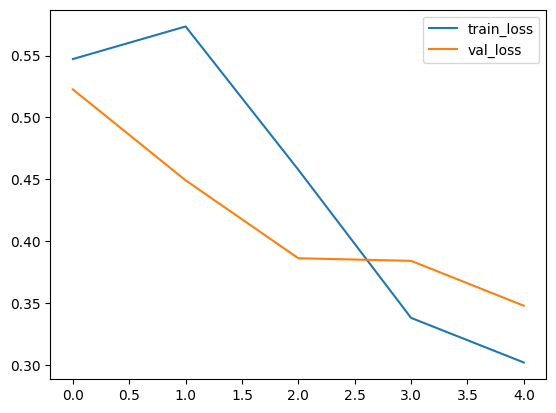

In [67]:
# Plotting loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')

In [74]:
# Prediction with test data
yhat = model.predict(TestData)
yhat = np.where(yhat >= 0.5, 1, 0)
print(yhat)

469/469 [==============================] - 15s 31ms/step
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [75]:
# Evaluating performance
print(classification_report(yTest, yhat))

              precision    recall  f1-score   support

           0       0.83      0.89      0.85      7481
           1       0.88      0.81      0.84      7519

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

